In [16]:
#Fetch historical stock data using yfinance
import yfinance as yf
import pandas as pd
import numpy as np

# Fetch data for a stock
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
data.to_csv(f'{ticker}_data.csv')


[*********************100%%**********************]  1 of 1 completed


In [15]:
#Data Processing
#Load and preprocess the data
data = pd.read_csv(f'{ticker}_data.csv', index_col='Date', parse_dates=True)
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
print(data)

                  Open        High         Low       Close     Volume
Date                                                                 
2020-01-02   74.059998   75.150002   73.797501   75.087502  135480400
2020-01-03   74.287498   75.144997   74.125000   74.357498  146322800
2020-01-06   73.447502   74.989998   73.187500   74.949997  118387200
2020-01-07   74.959999   75.224998   74.370003   74.597504  108872000
2020-01-08   74.290001   76.110001   74.290001   75.797501  132079200
...                ...         ...         ...         ...        ...
2022-12-23  130.919998  132.419998  129.639999  131.860001   63814900
2022-12-27  131.380005  131.410004  128.720001  130.029999   69007800
2022-12-28  129.669998  131.029999  125.870003  126.040001   85438400
2022-12-29  127.989998  130.479996  127.730003  129.610001   75703700
2022-12-30  128.410004  129.949997  127.430000  129.929993   77034200

[756 rows x 5 columns]


In [17]:
 #Strategy Development
# Implement a simple moving average crossover strategy
def moving_average_crossover(data, short_window=40, long_window=100):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    data['Signal'] = 0
    data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0)
    data['Position'] = data['Signal'].diff()
    return data


In [18]:
#Backtesting
#Simulate trades based on the strategy
def backtest_strategy(data):
    initial_balance = 10000
    balance = initial_balance
    positions = 0
    for index, row in data.iterrows():
        if row['Position'] == 1 and balance > 0:
            positions = balance // row['Close']
            balance -= positions * row['Close']
        elif row['Position'] == -1 and positions > 0:
            balance += positions * row['Close']
            positions = 0
    final_balance = balance + positions * data.iloc[-1]['Close']
    return final_balance

data = moving_average_crossover(data)
final_balance = backtest_strategy(data)
print(f"Final Portfolio Balance: ${final_balance:.2f}")


Final Portfolio Balance: $14386.47


C:\Users\kuche\AppData\Local\Temp\ipykernel_12812\2845459104.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0)


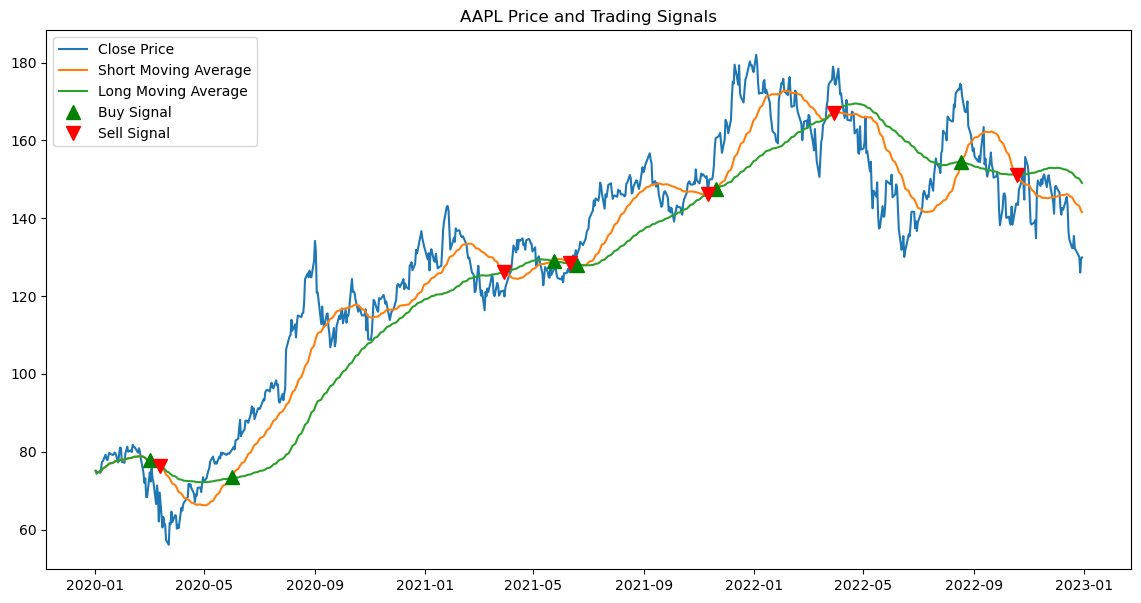

In [22]:
# Data Visualization
#Visualize the stock prices and trading signals
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['Short_MA'], label='Short Moving Average')
plt.plot(data['Long_MA'], label='Long Moving Average')
plt.plot(data[data['Position'] == 1].index, data['Short_MA'][data['Position'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(data[data['Position'] == -1].index, data['Short_MA'][data['Position'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')
plt.title(f'{ticker} Price and Trading Signals')
plt.legend()
plt.show()


In [23]:
#Reporting
#Generate a summary report of the trading performance
total_return = (final_balance - initial_balance) / initial_balance * 100
print(f"Total Return: {total_return:.2f}%")


Total Return: -85.00%
